In [68]:
from Bio import SeqIO, SeqUtils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Задание 1

In [69]:
# оставляем только те риды, у которых все нуклеотиды имеют качество PHRED не менее 20
def find_good_reads(filename): 
    good_reads = (record for record in SeqIO.parse(filename, 'fastq') if min(record.letter_annotations['phred_quality']) >= 20)
    SeqIO.write(good_reads, 'good_reads.fastq', 'fastq')
    
# создаём словарь "процент : число ридов с таким GC-составом в процентном отношении"
def create_gc_dict(filename):
    gc_dict = {}
    for record in SeqIO.parse(filename, 'fastq'):
        percentage = SeqUtils.GC(record.seq)
        if percentage not in gc_dict.keys():
            gc_dict[percentage] = 1
        else:
            gc_dict[percentage] = gc_dict[percentage] + 1
    M = []
    N = []
    for p in gc_dict.keys():
        M.append(p)
        N.append(gc_dict[p])
    return M, N

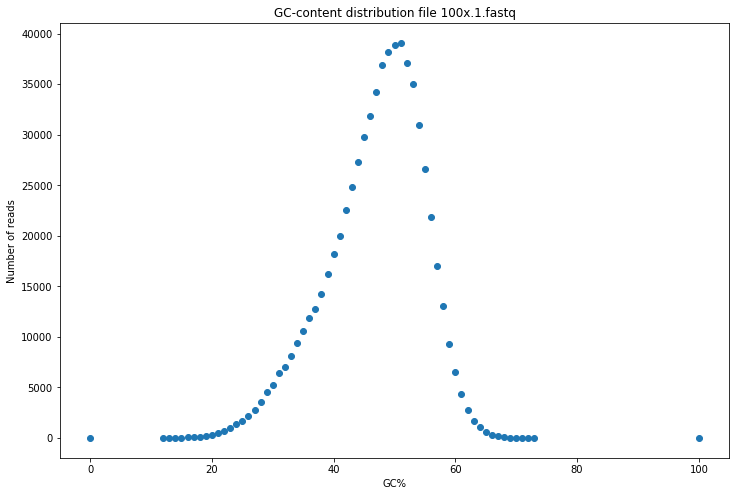

In [70]:
find_good_reads('100x.1.fastq')
M, N = create_gc_dict('good_reads.fastq') # рисуем график для файла 100x.1.fastq
plt.figure(figsize=(12, 8))
plt.xlabel('GC%')
plt.ylabel('Number of reads')
plt.title('GC-content distribution file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

Средний GC-состав равен примерно 50 %, что согласуется с выводом программы fastqc:

![title](fastqc_100x.1.fastq.pdf)

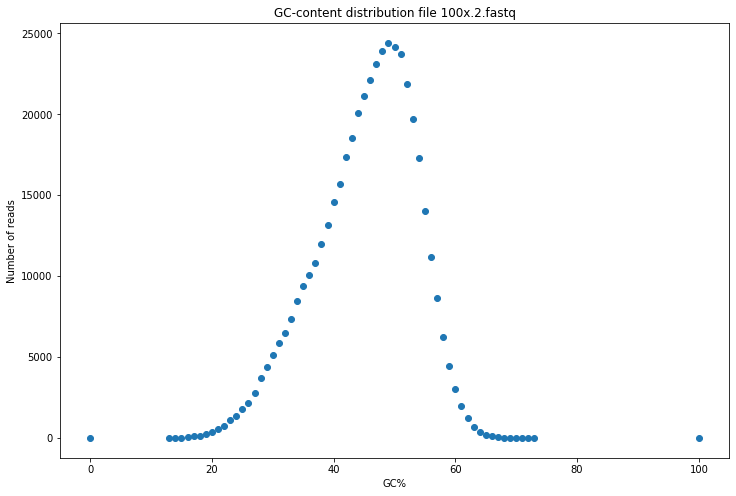

In [71]:
find_good_reads('100x.2.fastq')
M, N = create_gc_dict('good_reads.fastq') # рисуем график для файла 100x.2.fastq
plt.figure(figsize=(12, 8))
plt.xlabel('GC%')
plt.ylabel('Number of reads')
plt.title('GC-content distribution file 100x.2.fastq')
plt.scatter(M, N) 
plt.show()

Средний GC-состав равен 50 %, что согласуется с выводом программы fastqc:

![title](fastqc_100x.2.fastq.pdf)

### Задание 2

In [72]:
def seq_info(filename): # выясняем длину последовательностей и их количество 
    n = 0
    m = 0
    for record in SeqIO.parse(filename, 'fastq'):
        m += 1
        n = len(record.seq)
    return n, m

# создаём массив вероятностей ошибок по каждой последовательности по каждой позиции
def error_position_info(filename): 
    n, m = seq_info(filename)
    error_pos = np.zeros((n, m))
    count = -1
    for record in SeqIO.parse(filename, 'fastq'):
        count += 1
        p = np.asarray([pow(10, -Q/10) for Q in record.letter_annotations['phred_quality']])
        error_pos[:, count] = p
    return error_pos

# надо box plot построить

In [73]:
# получаем распределение вероятностей ошибок в зависимости от позиции нуклеотида
err = error_position_info('100x.1.fastq') 

In [74]:
df = pd.DataFrame(data=err.transpose(), columns = [str(i) for i in range(100)])
df_small = df[['0', '3', '5', '7', '9', '16', '28', '40', '52', '64', '76', '88', '99']] # берём некоторые позиции на выбор
print(df_small.head(5))

          0         3         5         7         9        16        28  \
0  0.000158  0.000126  0.000126  0.000126  0.000126  0.000251  0.000158   
1  0.000126  0.000126  0.000126  0.000251  0.000100  0.000126  0.000794   
2  0.000316  0.000316  0.005012  0.001000  0.000794  0.000316  0.630957   
3  0.000126  0.000251  0.000126  0.000126  0.000126  0.000126  0.000126   
4  0.000631  0.000398  0.000200  0.000126  0.000398  0.000794  0.000398   

         40        52        64        76        88        99  
0  0.630957  0.630957  0.630957  0.630957  0.630957  0.630957  
1  0.000158  0.005012  0.001585  0.003981  0.006310  0.630957  
2  0.630957  0.630957  0.630957  0.630957  0.630957  0.630957  
3  0.000126  0.000158  0.000126  0.000126  0.000251  0.000126  
4  0.000158  0.001259  0.001259  0.000158  0.002512  0.630957  


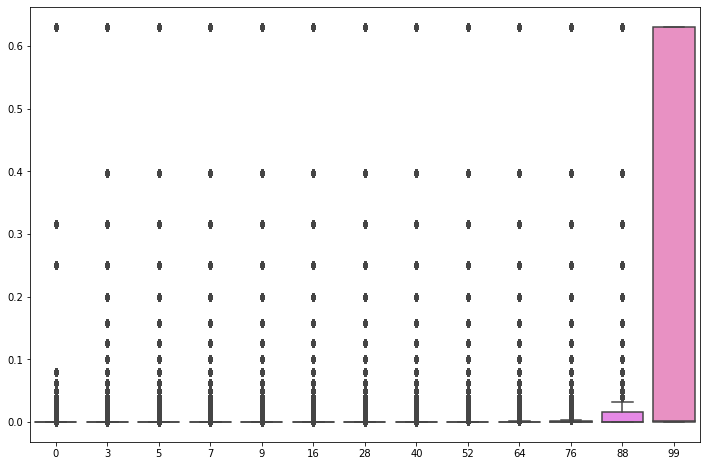

In [75]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df_small) # строим boxplot
plt.show()

In [76]:
err = error_position_info('100x.2.fastq') # делаем то же для файла 100x.2.fastq

In [77]:
df = pd.DataFrame(data=err.transpose(), columns = [str(i) for i in range(100)])
df_small = df[['0', '3', '5', '7', '9', '16', '28', '40', '52', '64', '76', '88', '99']]
print(df_small.head(5))

          0         3         5         7         9        16        28  \
0  0.000126  0.000251  0.000501  0.000398  0.000200  0.000126  0.000126   
1  0.000126  0.000251  0.000126  0.000126  0.000126  0.000126  0.000251   
2  0.630957  0.630957  0.630957  0.630957  0.630957  0.630957  0.630957   
3  0.000316  0.000158  0.000126  0.000126  0.000126  0.000126  0.000251   
4  0.000158  0.000158  0.000200  0.000251  0.000398  0.000158  0.000200   

         40        52        64        76        88        99  
0  0.000316  0.000158  0.000501  0.000316  0.000251  0.002512  
1  0.000126  0.000126  0.000158  0.000126  0.006310  0.000398  
2  0.630957  0.630957  0.630957  0.630957  0.630957  0.630957  
3  0.000126  0.000126  0.000501  0.000398  0.000251  0.025119  
4  0.039811  0.158489  0.000794  0.001000  0.630957  0.630957  


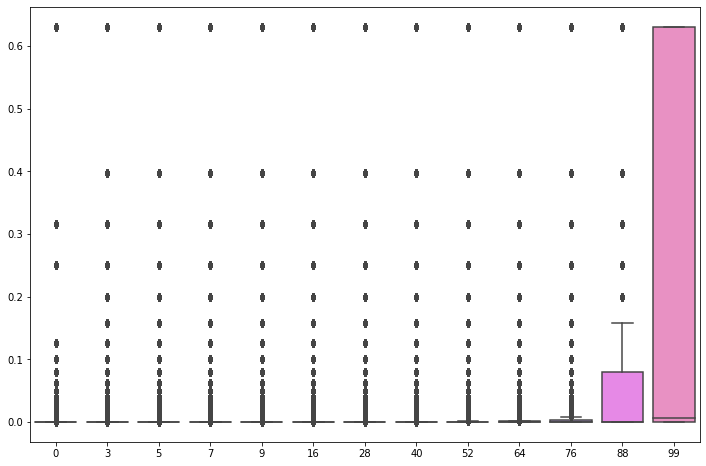

In [78]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = df_small)
plt.show()

Построенный boxplot распределения вероятностей ошибок в зависимости от позиции нуклеотида также согласуется с результатами fastqc - к концу рида вероятность ошибки увеличивается, качество падает. Вероятности ошибок вычислялись по PHRED-quality.

### Задание 4

In [79]:
def get_all_kmers(k): # ищем все возможные к-меры
    nucleotides = ['A', 'C', 'G', 'T']
    if k == 1:
        return nucleotides
    elif k > 1:
        a = get_all_kmers(k - 1)
        result = [a[i] + nucleotides[j] for i in range(len(a)) for j in range(len(nucleotides))]
        return result

# строим спектр к-мера
def get_kmer_spectrum(k, filename):
    kmer_spectrum = {}
    kmers = get_all_kmers(k)
    for kmer in kmers:
        kmer_spectrum[kmer] = 0
    for record in SeqIO.parse(filename, 'fastq'):
        seq = str(record.seq)
        seq_kmers = [seq[i:i+k] for i in range(len(seq) - k + 1)]
        for seq_kmer in seq_kmers:
            if 'N' not in seq_kmer:
                kmer_spectrum[seq_kmer] += 1
    N = []
    M = []
    k = np.array(list(kmer_spectrum.values()))
    for kmer in k:
        M.append(kmer)
        N.append(np.sum(np.where(k == kmer)))
    return M, N

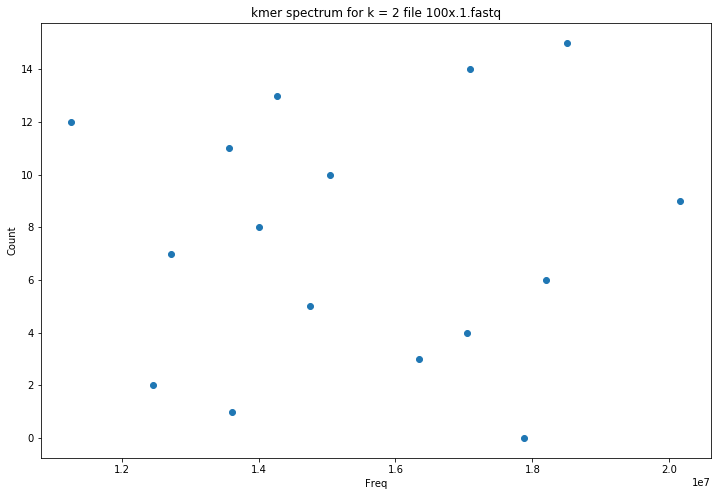

In [80]:
# рисуем график для файла 100x.1.fastq, k = 2
M, N = get_kmer_spectrum(2, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 2 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

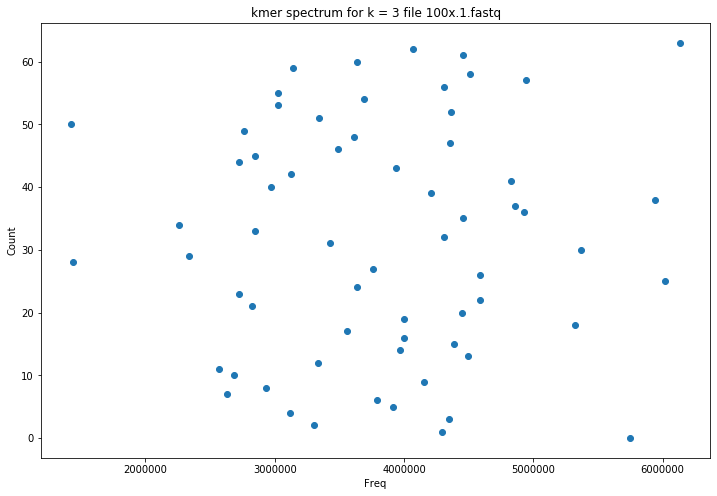

In [81]:
# рисуем график для файла 100x.1.fastq, k = 3
M, N = get_kmer_spectrum(3, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 3 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

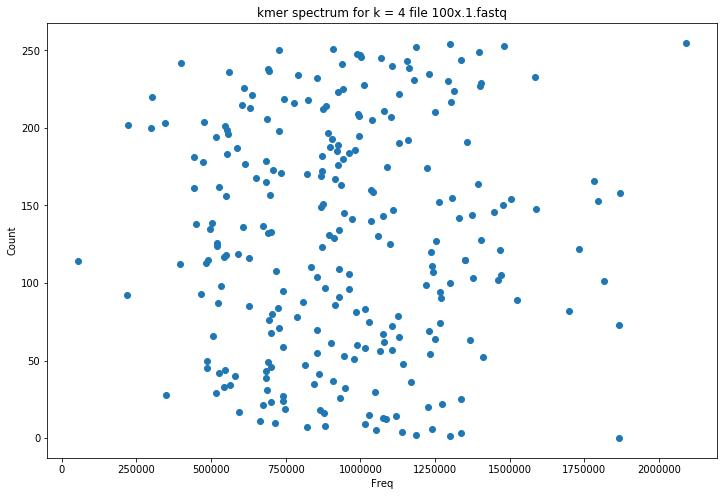

In [82]:
# рисуем график для файла 100x.1.fastq, k = 4
M, N = get_kmer_spectrum(4, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 4 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

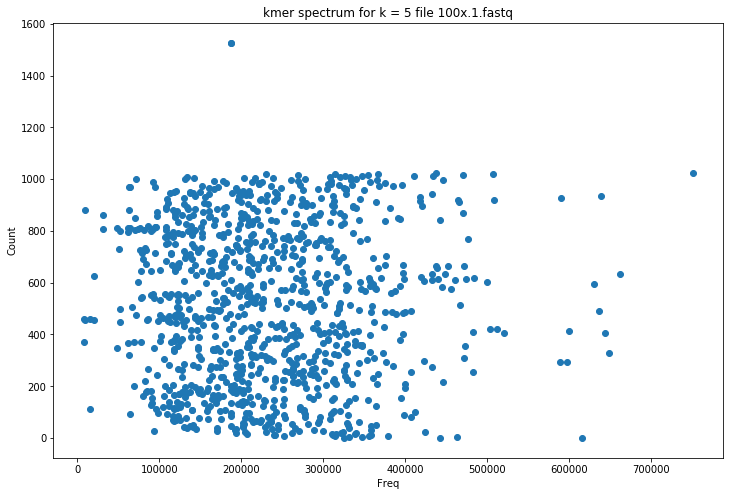

In [83]:
# рисуем график для файла 100x.1.fastq, k = 5
M, N = get_kmer_spectrum(5, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 5 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

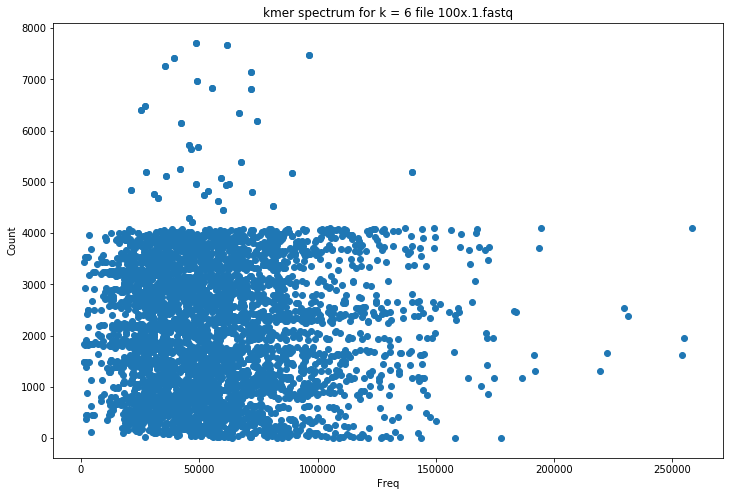

In [84]:
# рисуем график для файла 100x.1.fastq, k = 6
M, N = get_kmer_spectrum(6, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 6 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

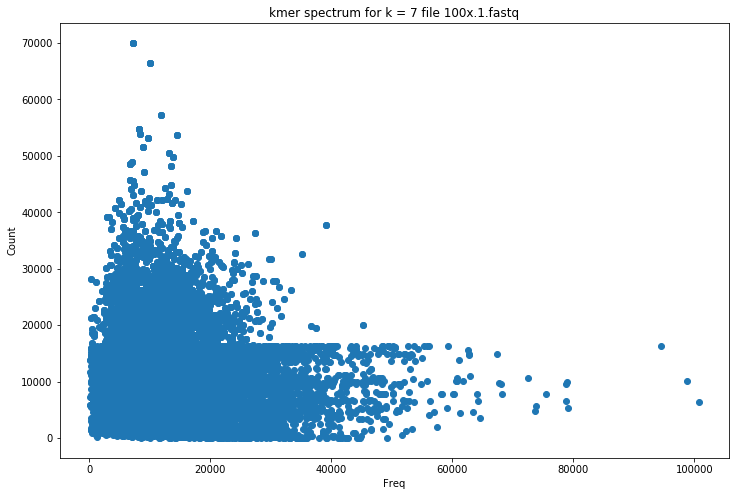

In [85]:
# рисуем график для файла 100x.1.fastq, k = 7
M, N = get_kmer_spectrum(7, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 7 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

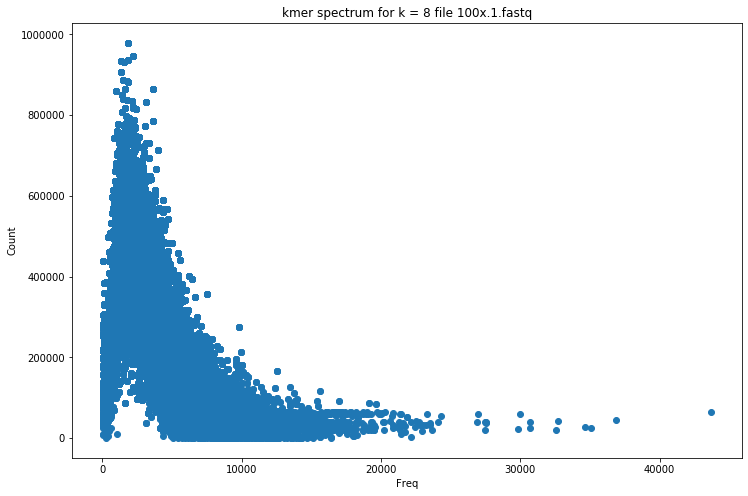

In [86]:
# рисуем график для файла 100x.1.fastq, k = 8
M, N = get_kmer_spectrum(8, '100x.1.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 8 file 100x.1.fastq')
plt.scatter(M, N)
plt.show()

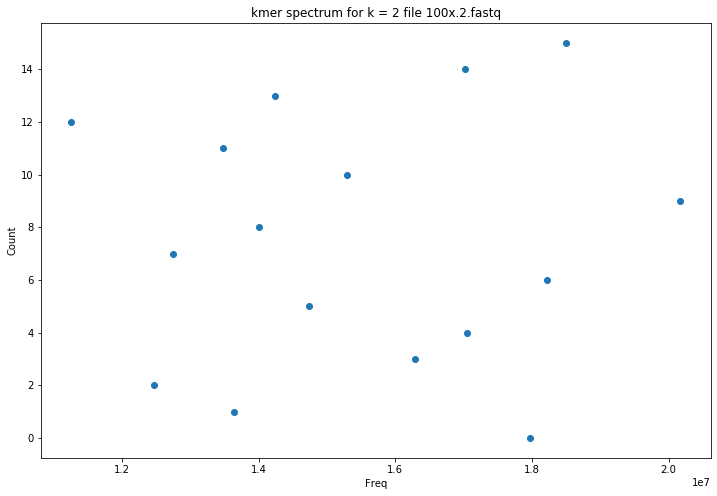

In [87]:
# рисуем график для файла 100x.2.fastq, k = 2
M, N = get_kmer_spectrum(2, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 2 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

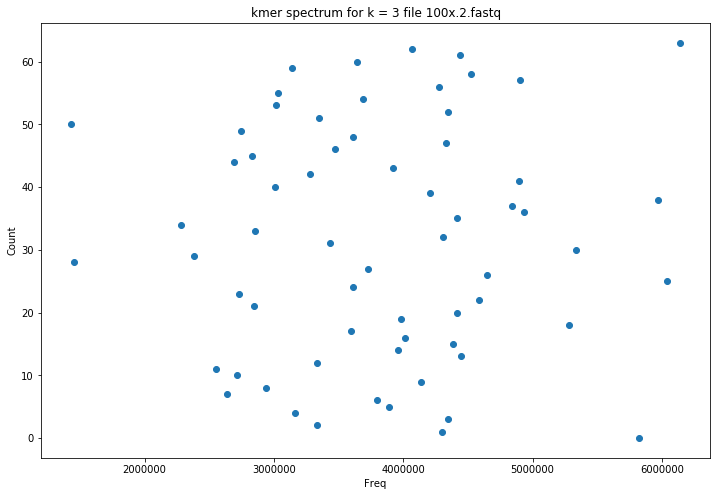

In [88]:
# рисуем график для файла 100x.2.fastq, k = 3
M, N = get_kmer_spectrum(3, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 3 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

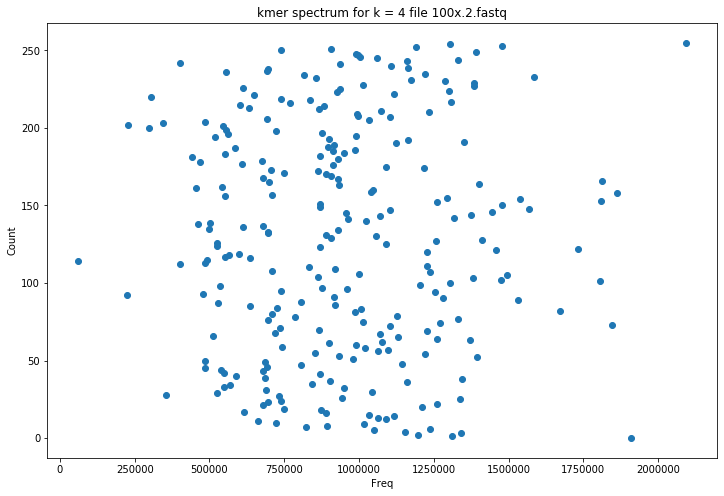

In [89]:
# рисуем график для файла 100x.2.fastq, k = 4
M, N = get_kmer_spectrum(4, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 4 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

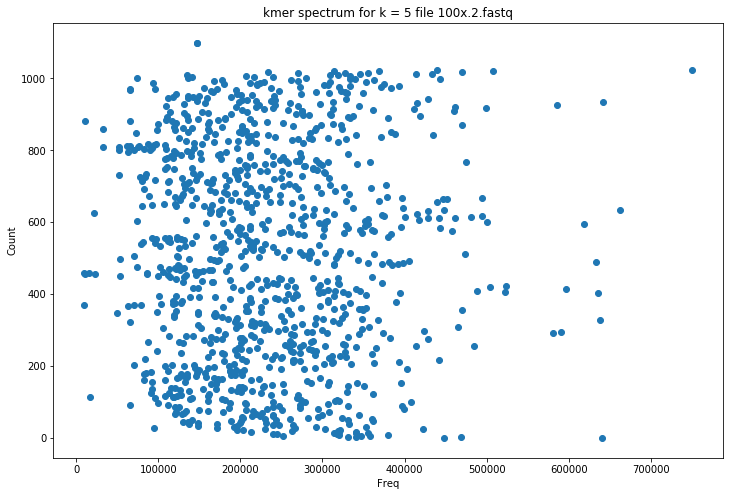

In [90]:
# рисуем график для файла 100x.2.fastq, k = 5
M, N = get_kmer_spectrum(5, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 5 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

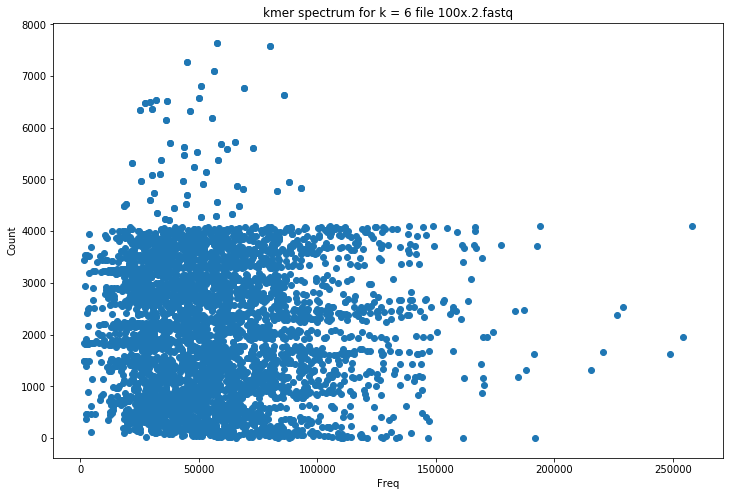

In [91]:
# рисуем график для файла 100x.2.fastq, k = 6
M, N = get_kmer_spectrum(6, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 6 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

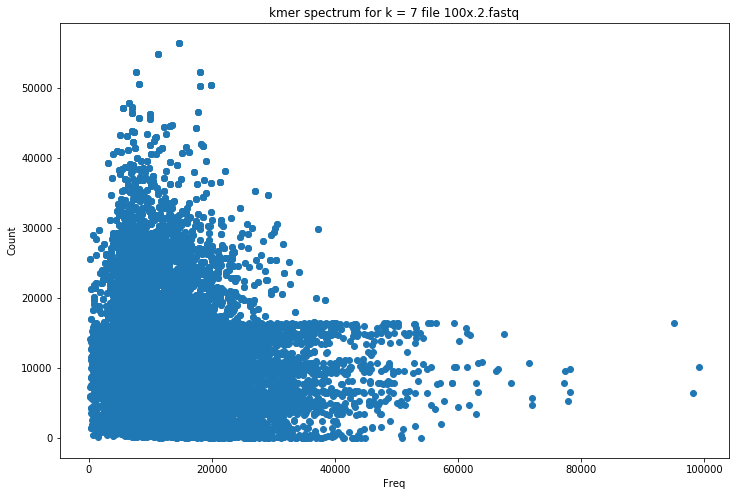

In [92]:
# рисуем график для файла 100x.2.fastq, k = 7
M, N = get_kmer_spectrum(7, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 7 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

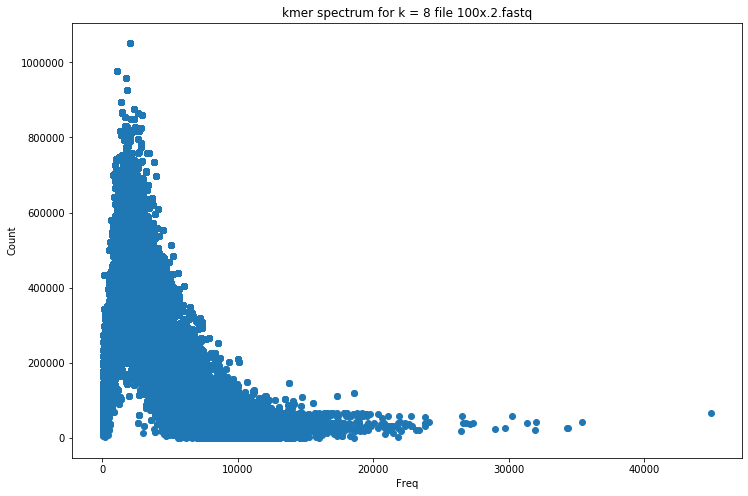

In [93]:
# рисуем график для файла 100x.2.fastq, k = 8
M, N = get_kmer_spectrum(8, '100x.2.fastq') 
plt.figure(figsize=(12, 8))
plt.xlabel('Freq')
plt.ylabel('Count')
plt.title('kmer spectrum for k = 8 file 100x.2.fastq')
plt.scatter(M, N)
plt.show()

Рисуем спектры k-меров для k = 2-8. При увеличении значения k видна унимодальность распределения, что подтверждается литературой (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2784323/). 